# Figure 6

In [37]:
dib_ncgr_kmers <- read.csv("../assembly_evaluation_data/unique_kmers.csv")
unique_dammit_names_numbers <- read.csv("../assembly_evaluation_data/unqiue_gene_names_ncgr_dib.csv")
unique_dammit_names <- read.csv("../assembly_evaluation_data/normalized_unique_gene_names_ncgr_dib.csv")
#head(dib_ncgr_kmers)
#dim(dib_ncgr_kmers)
#head(unique_dammit_names)
#dim(unique_dammit_names)

The following are MMETSP samples with multiple sequencing runs, each with separate re-assemblies (see [explanation](https://github.com/ljcohen/MMETSP/blob/master/notebooks/MMETSP_imicrobe_NCBI-SRA_sample_id_verification.ipynb)). These are excluded from all quality analyses: 

In [16]:
head(dib_ncgr_kmers)

SampleName,Phylum,Unique_kmers_assembly,Unique_kmers
MMETSP0004,Ochrophyta,19837761,9187479
MMETSP0005,Ochrophyta,20350054,8874387
MMETSP0006,Haptophyta,25286098,9558658
MMETSP0007,Haptophyta,12496793,6672958
MMETSP0008,Haptophyta,22149727,11925639
MMETSP0008,Haptophyta,22149727,11925639


In [7]:
special_flowers = c("MMETSP0693","MMETSP1019","MMETSP0923","MMETSP0008","MMETSP1002","MMETSP1325","MMETSP1018","MMETSP1346","MMETSP0088","MMETSP0092","MMETSP0717","MMETSP0223","MMETSP0115","MMETSP0196","MMETSP0197","MMETSP0398","MMETSP0399","MMETSP0922")

In [8]:
# Only use 7 most common phyla
sub_phy<-c("Bacillariophyta","Dinophyta","Ochrophyta","Haptophyta","Ciliophora","Chlorophyta","Cryptophyta")

pdf 
  2

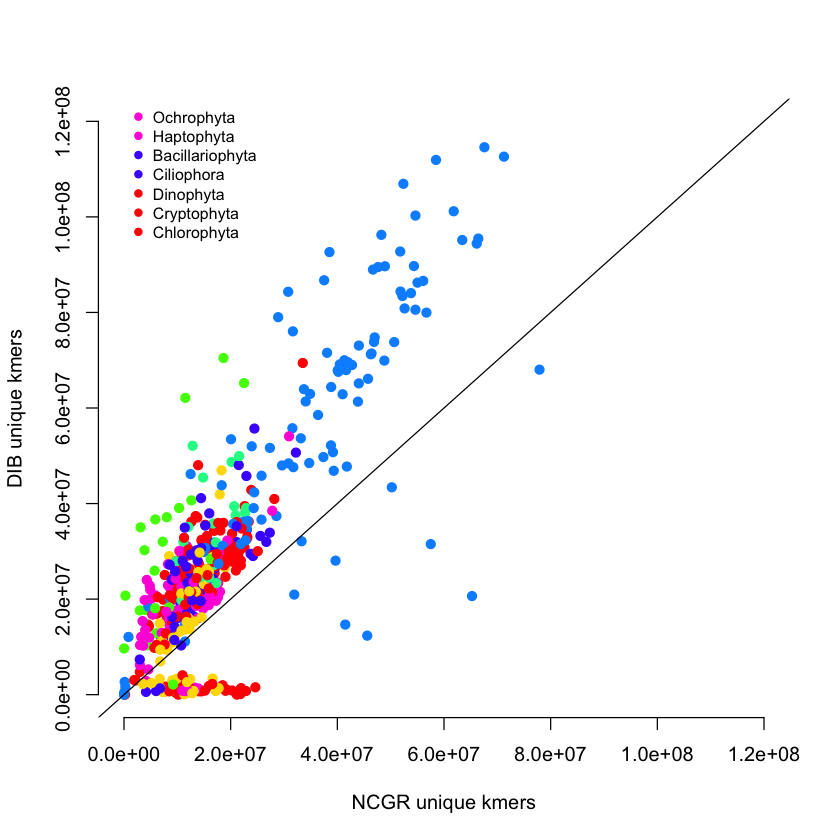

In [26]:
Cols = function(vec){
  cols=rainbow(length(unique(vec)))
  return(cols[as.numeric(as.factor(vec))])}


dib_ncgr_kmers <- dib_ncgr_kmers[!dib_ncgr_kmers$SampleName %in% special_flowers,]
#dim(dib_ncgr_kmers)
#head(dib_ncgr_kmers)
dib_greater<-dib_ncgr_kmers[which(dib_ncgr_kmers$DIB>dib_ncgr_kmers$NCGR),]
ncgr_greater<-dib_ncgr_kmers[which(dib_ncgr_kmers$NCGR>dib_ncgr_kmers$DIB),]
#dim(dib_greater)
#dim(ncgr_greater)
dib_ncgr_kmers<-dib_ncgr_kmers[dib_ncgr_kmers$Phylum %in% sub_phy,]
pdf("../paper/Figure6_unique_kmers.pdf")
png("../paper/Figure6_unique_kmers.png")

plot(dib_ncgr_kmers$Unique_kmers,dib_ncgr_kmers$Unique_kmers_assembly, ylim=c(-1,120000000),xlim=c(-1,120000000),ylab = "DIB unique kmers",xlab="NCGR unique kmers",col=Cols(as.character(dib_ncgr_kmers$Phylum)),pch=19,frame.plot = FALSE)
abline(0,1)
legend(20,125000000,legend=unique(as.character(dib_ncgr_kmers$Phylum)),col=Cols(as.character(dib_ncgr_kmers$Phylum)),cex=0.8, pch=19,bty="n")
dev.off()
plot(dib_ncgr_kmers$Unique_kmers,dib_ncgr_kmers$Unique_kmers_assembly, ylim=c(-1,120000000),xlim=c(-1,120000000),ylab = "DIB unique kmers",xlab="NCGR unique kmers",col=Cols(as.character(dib_ncgr_kmers$Phylum)),pch=19,frame.plot = FALSE)
abline(0,1)
legend(20,125000000,legend=unique(as.character(dib_ncgr_kmers$Phylum)),col=Cols(as.character(dib_ncgr_kmers$Phylum)),cex=0.8, pch=19,bty="n")

In [20]:
rainbow(length(unique(dib_ncgr_kmers$Phylum)))

[1] "#FF0000FF" "#FF4300FF" "#FF8500FF" "#FFC800FF" "#F4FF00FF" "#B1FF00FF"
 [7] "#6FFF00FF" "#2CFF00FF" "#00FF16FF" "#00FF59FF" "#00FF9BFF" "#00FFDEFF"
[13] "#00DEFFFF" "#009BFFFF" "#0059FFFF" "#0016FFFF" "#2C00FFFF" "#6F00FFFF"
[19] "#B100FFFF" "#F400FFFF" "#FF00C8FF" "#FF0085FF" "#FF0043FF"

# Figure 7

In [36]:
Cols = function(vec){
  cols=rainbow(length(unique(vec)))
  return(cols[as.numeric(as.factor(vec))])}

unique_dammit_names <- unique_dammit_names[,c(2:4)]
colnames(unique_dammit_names) <- c("SampleName","NCGR","DIB")
#head(unique_dammit_names)
unique_dammit_names <- merge(unique_dammit_names,dib_ncgr_kmers,by="SampleName")
unique_dammit_names <- unique_dammit_names[,c(1:4)]
#head(unique_dammit_names)
sub_phy<-c("Bacillariophyta","Dinophyta","Ochrophyta","Haptophyta","Ciliophora","Chlorophyta","Cryptophyta")
#dim(unique_dammit_names)
unique_dammit_names <- unique_dammit_names[unique_dammit_names$Phylum %in% sub_phy,]
#head(sub)
pdf("../paper/Figure7_unique_gene_names.pdf")
png("../paper/Figure7_unique_gene_names.png")
plot(unique_dammit_names$NCGR,unique_dammit_names$DIB,ylim=c(-0.01,1.1),xlim=c(-0.01,1.1),col=Cols(as.character(unique_dammit_names$Phylum)),pch=19,ylab = "unique names in DIB re-assemblies",xlab="unique names in NCGR assemblies",main="Counts of unique gene names per total number of annotated contigs",frame.plot = FALSE)
abline(0,1)
legend(0,1.1,legend=unique(as.character(unique_dammit_names$Phylum)),col=Cols(as.character(unique_dammit_names$Phylum)),cex=0.8, pch=19,bty="n")
dev.off()
plot(unique_dammit_names$NCGR,unique_dammit_names$DIB,ylim=c(-0.01,1.1),xlim=c(-0.01,1.1),col=Cols(as.character(unique_dammit_names$Phylum)),pch=19,ylab = "unique names in DIB re-assemblies",xlab="unique names in NCGR assemblies",main="Counts of unique gene names per total number of annotated contigs",frame.plot = FALSE)
abline(0,1)
legend(0,1.1,legend=unique(as.character(unique_dammit_names$Phylum)),col=Cols(as.character(unique_dammit_names$Phylum)),cex=0.8, pch=19,bty="n")

Warning message in spineplot.default(x, y, ...):
“x axis is on a cumulative probability scale, 'xlim' must be in [0,1]”Warning message in spineplot.default(x, y, ...):
“y axis is on a cumulative probability scale, 'ylim' must be in [0,1]”Warning message in rect(xleft, ybottom, xright, ytop, col = col, ...):
“"frame.plot" is not a graphical parameter”

ERROR: Error in axis(1, at = (xat[1L:nx] + xat[2L:(nx + 1L)] - off)/2, labels = xaxlabels, : no locations are finite


In [33]:
class(as.character(unique_dammit_names$Phylum))

[1] "character"

In [38]:
head(unique_dammit_names)

X,MMETSP_id,NCGR,DIB
0,MMETSP1385,0.20790429,0.3558399
1,MMETSP1144,0.17955993,0.2911385
2,MMETSP0471,0.10702730,0.2700177
3,MMETSP0957,0.13410673,0.3766067
4,MMETSP1058,0.07652782,0.1749226
5,MMETSP1136,0.18214248,0.3430634
